In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [68]:
data = pd.read_csv("MonthElb_012010_004028900.csv",na_values=9999.9)
data

,DATE,ORA,ID_RETE_MOUNT,CODICE_ISTAT_COMUNE,PROGR_PUNTO_COM,VELV,DIRV,DEVST,BARO,TERMA,IGRO,RADD,RADR,PLUV
0,01-01-2010,00:00,17,4028,900,0.4,175.7,NaN,925.7,1.3,84.0,NaN,NaN,0.0
1,01-01-2010,01:00,17,4028,900,0.0,NaN,NaN,925.1,1.3,84.0,NaN,NaN,0.0
2,01-01-2010,02:00,17,4028,900,0.6,197.0,NaN,924.6,1.4,84.0,NaN,NaN,0.0
3,01-01-2010,03:00,17,4028,900,0.9,187.1,NaN,923.8,1.7,84.0,NaN,NaN,0.0
4,01-01-2010,04:00,17,4028,900,1.1,190.7,NaN,923.4,2.2,82.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2010,19:00,17,4028,900,1.0,177.2,NaN,952.6,-3.5,99.0,NaN,NaN,0.0
8756,31-12-2010,20:00,17,4028,900,1.3,190.5,NaN,952.3,-3.7,100.0,NaN,NaN,0.0
8757,31-12-2010,21:00,17,4028,900,1.3,182.1,NaN,952.8,-3.9,100.0,NaN,NaN,0.0
8758,31-12-2010,22:00,17,4028,900,1.3,186.4,NaN,953.0,-4.5,100.0,NaN,NaN,0.0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE                 8760 non-null   object 
 1   ORA                  8760 non-null   object 
 2   ID_RETE_MOUNT        8760 non-null   int64  
 3   CODICE_ISTAT_COMUNE  8760 non-null   int64  
 4   PROGR_PUNTO_COM      8760 non-null   int64  
 5   VELV                 8760 non-null   float64
 6   DIRV                 6683 non-null   float64
 7   DEVST                0 non-null      float64
 8   BARO                 8760 non-null   float64
 9   TERMA                8759 non-null   float64
 10  IGRO                 8760 non-null   float64
 11  RADD                 0 non-null      float64
 12  RADR                 0 non-null      float64
 13  PLUV                 8760 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 958.3+ KB


In [70]:
data_clean=data.drop(columns=["DEVST","RADD","RADR","DIRV"]).dropna()
data_clean.reset_index(inplace=True)
data_clean.rename(columns={"index":"ORE_PASSATE"},inplace=True)
data_clean

,ORE_PASSATE,DATE,ORA,ID_RETE_MOUNT,CODICE_ISTAT_COMUNE,PROGR_PUNTO_COM,VELV,BARO,TERMA,IGRO,PLUV
0,0,01-01-2010,00:00,17,4028,900,0.4,925.7,1.3,84.0,0.0
1,1,01-01-2010,01:00,17,4028,900,0.0,925.1,1.3,84.0,0.0
2,2,01-01-2010,02:00,17,4028,900,0.6,924.6,1.4,84.0,0.0
3,3,01-01-2010,03:00,17,4028,900,0.9,923.8,1.7,84.0,0.0
4,4,01-01-2010,04:00,17,4028,900,1.1,923.4,2.2,82.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8754,8755,31-12-2010,19:00,17,4028,900,1.0,952.6,-3.5,99.0,0.0
8755,8756,31-12-2010,20:00,17,4028,900,1.3,952.3,-3.7,100.0,0.0
8756,8757,31-12-2010,21:00,17,4028,900,1.3,952.8,-3.9,100.0,0.0
8757,8758,31-12-2010,22:00,17,4028,900,1.3,953.0,-4.5,100.0,0.0


In [93]:
VELV=data_clean["VELV"].values
PLUV=data_clean["PLUV"].values
TERMA=data_clean["TERMA"].values

47.8

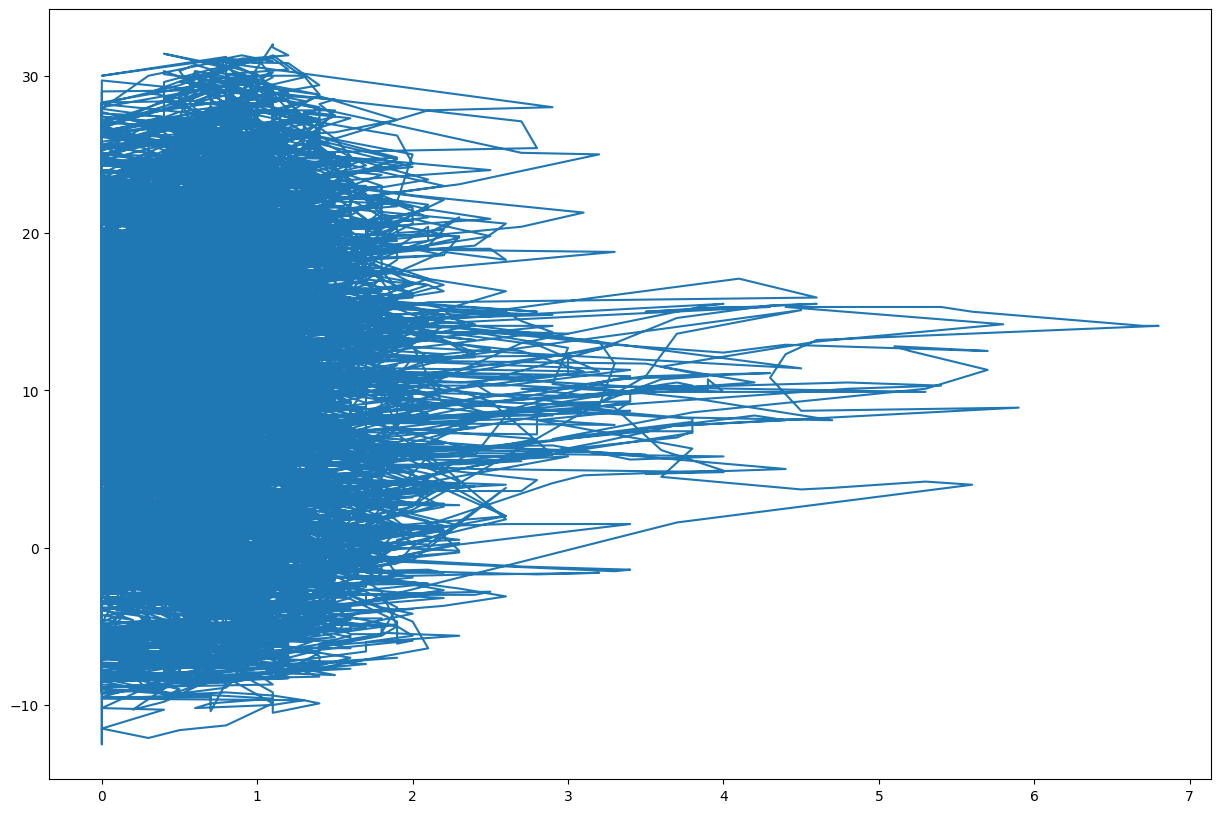

In [90]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(VELV,TERMA)
plt.show()

In [73]:
X=ORE_PASSATE
Y=TERMA

In [74]:
sc_x=StandardScaler()
sc_y=StandardScaler()
X_2d=X[:,np.newaxis]
Y_2d=Y[:,np.newaxis]
X_norm=sc_x.fit_transform(X_2d)
Y_norm=sc_y.fit_transform(Y_2d)

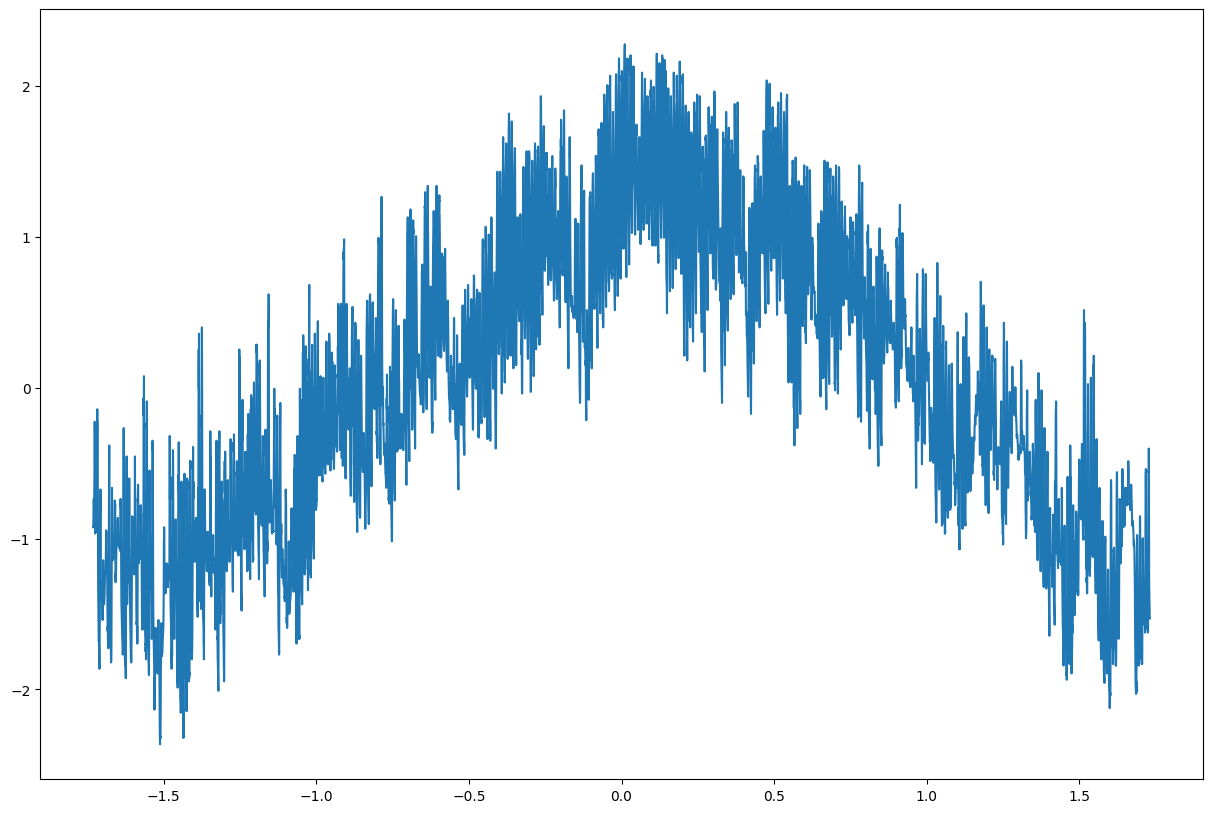

In [75]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(X_norm,Y_norm)
plt.show()

In [76]:
model=LinearRegression().fit(X_norm,Y_norm)
model.score(X_norm,Y_norm)

0.024647598224051825

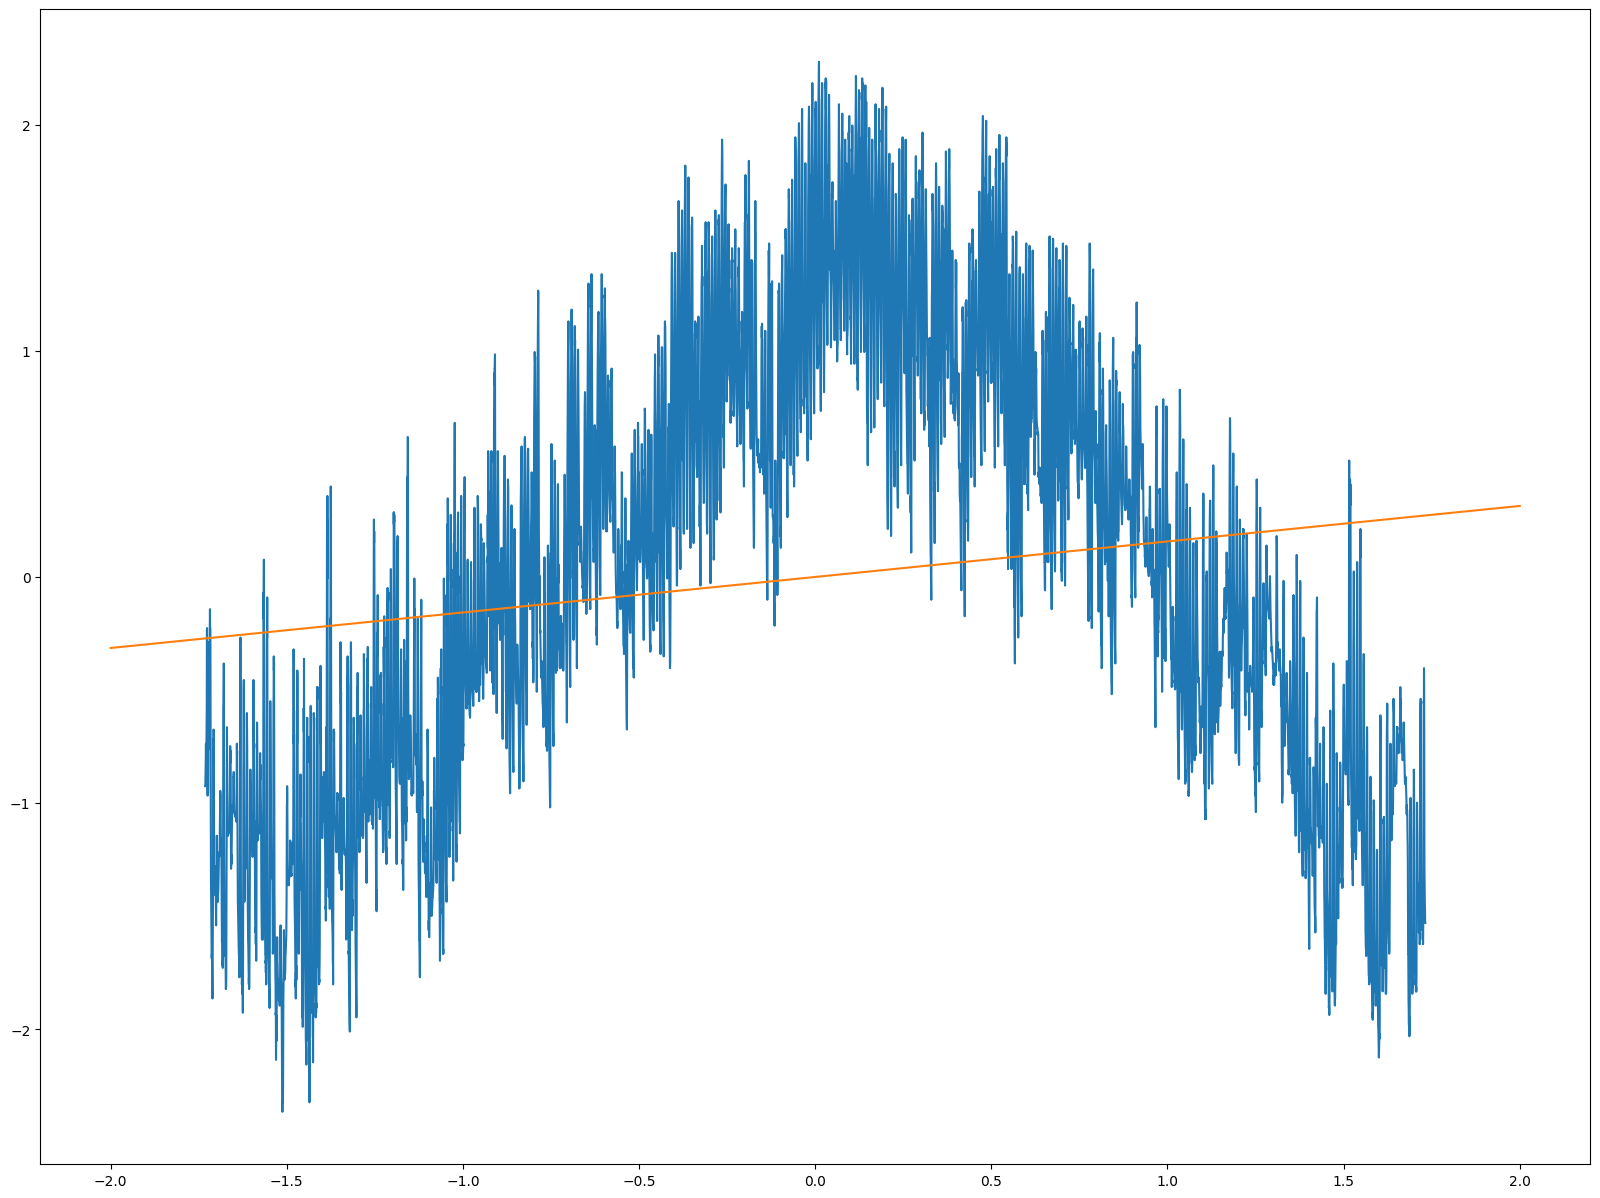

In [77]:
array_x=np.linspace(-2,2,100)
array_y=model.coef_[0][0]*array_x
fig,ax=plt.subplots(figsize=(20,15))
ax.plot(X_norm,Y_norm)
ax.plot(array_x,array_y)
plt.show()